In [81]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

#Power-Law (Gamma) Transformation

In [82]:
img = Image.open('/content/Cameraman.bmp')

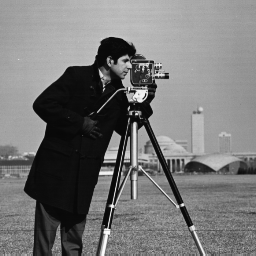

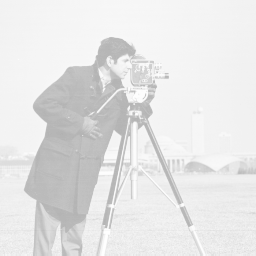

In [83]:
#原始圖片
display(img)

#Gamma圖片
gamma = 0.1
np_img = np.array(img) 
gamma_img = np.array(255*(np_img / 255) ** gamma, dtype = 'uint8') 
display(Image.fromarray(gamma_img))

#Histogram Qualization

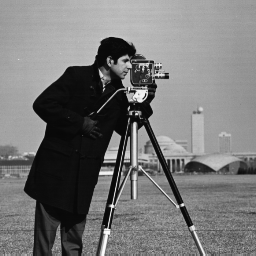

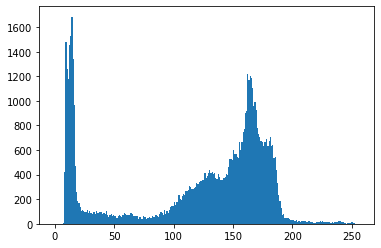

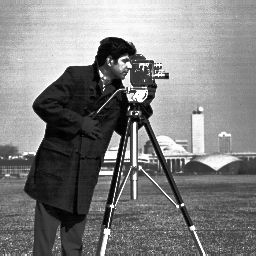

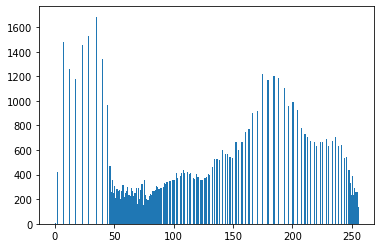

In [84]:
#原始圖片
display(img)
plt.hist(np.array(img).ravel(), 256, [0, 256])
plt.show()

#Histogram Qualization圖片
HQ_img = np.array(img)
rows, cols = HQ_img.shape
H = np.zeros(256, int)
Hc = np.zeros(256, int)
T = np.zeros(256, int)

for i in range(rows):
  for j in range(cols):
    H[HQ_img[i][j]] = H[HQ_img[i][j]] + 1
g_min = np.nonzero(H)[0][0]
for i in range(1, 256):
  Hc[i] = Hc[i - 1] + H[i]
H_min = Hc[g_min]

try:
  for i in range(256):
    T[i] = round(((Hc[i] - H_min) * 255) / ((cols * rows) - H_min))
except:
  print("計算錯誤", "分母為0")

for i in range(rows):
  for j in range(cols):
    HQ_img[i][j] = T[HQ_img[i][j]]

HQ_img = Image.fromarray(HQ_img)
display(Image.open('HQ.png'))
plt.hist(np.array(HQ_img).ravel(), 256, [0, 256])
plt.show()

#Laplacian opearator

In [85]:
def del2(M):
    dx = 1
    dy = 1
    rows, cols = M.shape
    dx = dx * np.ones ((1, cols - 1))
    dy = dy * np.ones ((rows-1, 1))

    mr, mc = M.shape
    D = np.zeros ((mr, mc))

    if (mr >= 3):
        ## x direction
        ## left and right boundary
        D[:, 0] = (M[:, 0] - 2 * M[:, 1] + M[:, 2]) / (dx[:,0] * dx[:,1])
        D[:, mc-1] = (M[:, mc - 3] - 2 * M[:, mc - 2] + M[:, mc-1]) \
            / (dx[:,mc - 3] * dx[:,mc - 2])

        ## interior points
        tmp1 = D[:, 1:mc - 1] 
        tmp2 = (M[:, 2:mc] - 2 * M[:, 1:mc - 1] + M[:, 0:mc - 2])
        tmp3 = np.kron (dx[:,0:mc -2] * dx[:,1:mc - 1], np.ones ((mr, 1)))
        D[:, 1:mc - 1] = tmp1 + tmp2 / tmp3

    if (mr >= 3):
        ## y direction
        ## top and bottom boundary
        D[0, :] = D[0,:]  + \
            (M[0, :] - 2 * M[1, :] + M[2, :] ) / (dy[0,:] * dy[1,:])

        D[mr-1, :] = D[mr-1, :] \
            + (M[mr-3,:] - 2 * M[mr-2, :] + M[mr-1, :]) \
            / (dy[mr-3,:] * dx[:,mr-2])

        ## interior points
        tmp1 = D[1:mr-1, :] 
        tmp2 = (M[2:mr, :] - 2 * M[1:mr - 1, :] + M[0:mr-2, :])
        tmp3 = np.kron (dy[0:mr-2,:] * dy[1:mr-1,:], np.ones ((1, mc)))
        D[1:mr-1, :] = tmp1 + tmp2 / tmp3

    return D / 4

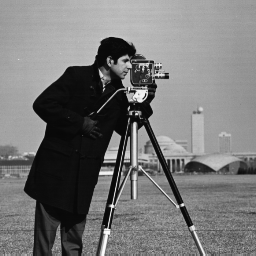

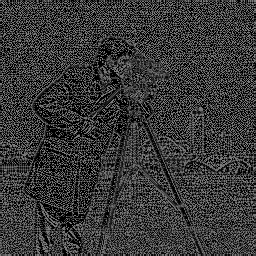

In [86]:
#原始圖片
display(img)

#Laplacian opearator圖片
laplacian_img = del2(np_img)
display(Image.fromarray(laplacian_img).convert('L'))